## Importacion de Librerias y Dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv("C:/Users/peria/OneDrive/Documentos/Datasets/liga_2023.csv")
pd.set_option("display.max_rows", None)

## EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34356 entries, 0 to 34355
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date_name        34356 non-null  object
 1   local_team_id    34356 non-null  int64 
 2   local_team       34356 non-null  object
 3   local_result     34356 non-null  int64 
 4   visitor_result   34356 non-null  int64 
 5   visitor_team     34356 non-null  object
 6   visitor_team_id  34356 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 1.8+ MB


In [8]:
df.shape

(34356, 7)

In [24]:
df.dtypes

date_name          object
local_team_id       int64
local_team         object
local_result        int64
visitor_result      int64
visitor_team       object
visitor_team_id     int64
dtype: object

In [10]:
df.columns

Index(['date_name', 'local_team_id', 'local_team', 'local_result',
       'visitor_result', 'visitor_team', 'visitor_team_id'],
      dtype='object')

In [15]:
df.head()

,date_name,local_team_id,local_team,local_result,visitor_result,visitor_team,visitor_team_id
0,Campeonato 1931,13,Atlanta,1,1,Velez,94
1,Campeonato 1931,73,Racing Club,1,1,Quilmes,71
2,Campeonato 1931,71,Quilmes,2,0,Racing Club,73
3,Campeonato 1931,48,Huracan,2,4,Racing Club,73
4,Campeonato 1931,17,Boca Juniors,5,2,Atlanta,13


In [17]:
df.describe()

,local_team_id,local_result,visitor_result,visitor_team_id
count,34356.000000,34356.000000,34356.000000,34356.000000
mean,52.551083,1.633921,1.161631,52.561649
std,27.140640,1.397368,1.136800,27.122121
min,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1.000000,0.000000,27.000000
50%,56.000000,1.000000,1.000000,56.000000
75%,75.000000,2.000000,2.000000,75.000000
max,95.000000,12.000000,11.000000,95.000000


In [23]:
df["local_team"].value_counts()

local_team
Boca Juniors           1719
River Plate            1712
Independiente          1683
San Lorenzo            1679
Estudiantes (LP)       1653
Velez                  1651
Racing Club            1641
Newells                1518
Gimnasia (LP)          1467
Rosario Central        1460
Huracan                1448
Argentinos             1311
Lanus                  1190
Ferro                  1164
Platense               1065
Chacarita               962
Banfield                955
Colon                   846
Atlanta                 785
Union                   737
Tigre                   623
Talleres (C)            617
Quilmes                 597
Belgrano                410
Arsenal                 353
Instituto               299
Dep. Español            280
Godoy Cruz              279
Gimnasia (J)            259
All Boys                248
Temperley               217
Olimpo                  216
Atl Tucuman             216
Racing (C)              204
San Martin (T)          189
Nueva Chi

In [25]:
df.isnull().sum()

date_name          0
local_team_id      0
local_team         0
local_result       0
visitor_result     0
visitor_team       0
visitor_team_id    0
dtype: int64

In [30]:
(df["local_team"].value_counts() + df["visitor_team"].value_counts()).sort_values(ascending=False).head(10)

Boca Juniors        3416
River Plate         3415
Independiente       3369
San Lorenzo         3350
Estudiantes (LP)    3311
Velez               3298
Racing Club         3288
Newells             3044
Gimnasia (LP)       2943
Rosario Central     2917
Name: count, dtype: int64

In [48]:
avg_home_score = df["local_result"].mean()
avg_away_score = df["visitor_result"].mean()
max_home_score = df["local_result"].max()
max_away_score = df["visitor_result"].max()

print(f"El promedio de goles para el local es {avg_home_score}" " y " f"el promedio de goles para el visitante es {avg_away_score}")
print(f"El resultado mas alto para un local fue de {max_home_score}" " y " f"para un visitante {max_away_score}")

El promedio de goles para el local es 1.633921294679241 y el promedio de goles para el visitante es 1.1616311561299337
El resultado mas alto para un local fue de 12 y para un visitante 11


## Visualizacion 

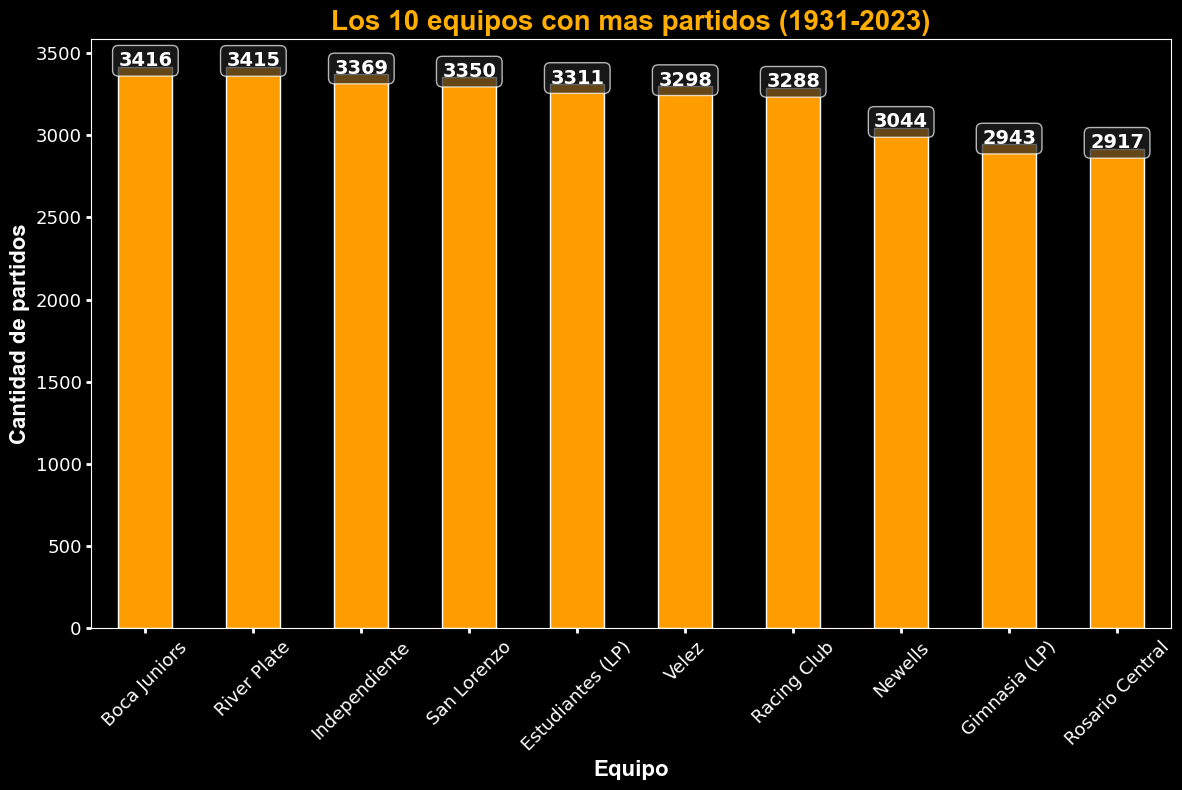

In [53]:
plt.style.use("dark_background")
ax = (df["local_team"].value_counts() + df["visitor_team"].value_counts()).sort_values(ascending=False).head(10).plot(
    kind="bar", 
    figsize=(12, 8), 
    color="#FF9D00",  # dorado
    edgecolor="white"
)
ax.set_title("Los 10 equipos con mas partidos (1931-2023)", color="#FFAE00", fontsize=20, weight="bold", fontname="Arial")
ax.set_xlabel("Equipo", color="white", fontsize=16, fontweight="bold", fontname="Arial")
ax.set_ylabel("Cantidad de partidos", color="white", fontsize=16, fontweight="bold", fontname="Arial")
ax.tick_params(axis='x', colors='white', labelrotation=45, labelsize=13, width=2)
ax.tick_params(axis='y', colors='white', labelsize=13, width=2)
for spine in ax.spines.values():
    spine.set_edgecolor('white')
for i, v in enumerate((df["local_team"].value_counts() + df["visitor_team"].value_counts()).sort_values(ascending=False).head(10)):
    ax.text(i, v + 2, str(v), color='white', ha='center', fontsize=14, fontweight='bold', bbox=dict(facecolor='#222', alpha=0.7, boxstyle='round,pad=0.3'))
plt.tight_layout()
plt.show()

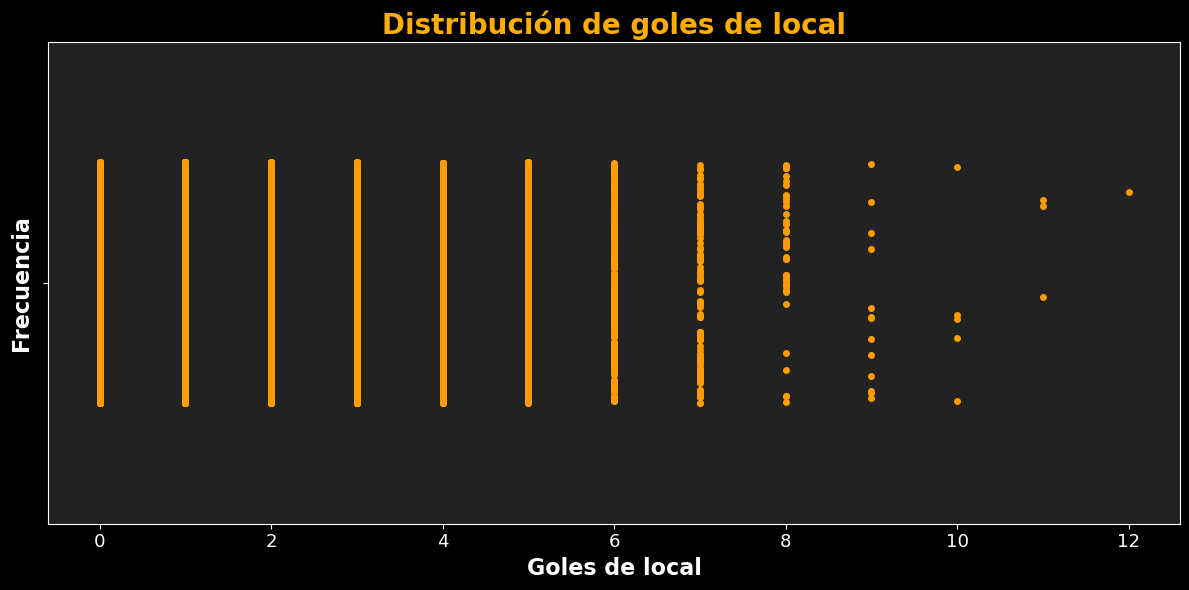

In [61]:
plt.figure(figsize=(12, 6))
sns.stripplot(x="local_result", data=df, color="#FF9D00", size=5, jitter=0.25)
plt.title("Distribución de goles de local", color="#FFAE00", fontsize=20, weight="bold")
plt.xlabel("Goles de local", color="white", fontsize=16, weight="bold")
plt.ylabel("Frecuencia", color="white", fontsize=16, weight="bold")
plt.xticks(color='white', fontsize=13)
plt.yticks(color='white', fontsize=13)
plt.gca().set_facecolor("#222")
plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['left'].set_color('white')
plt.tight_layout()
plt.show()

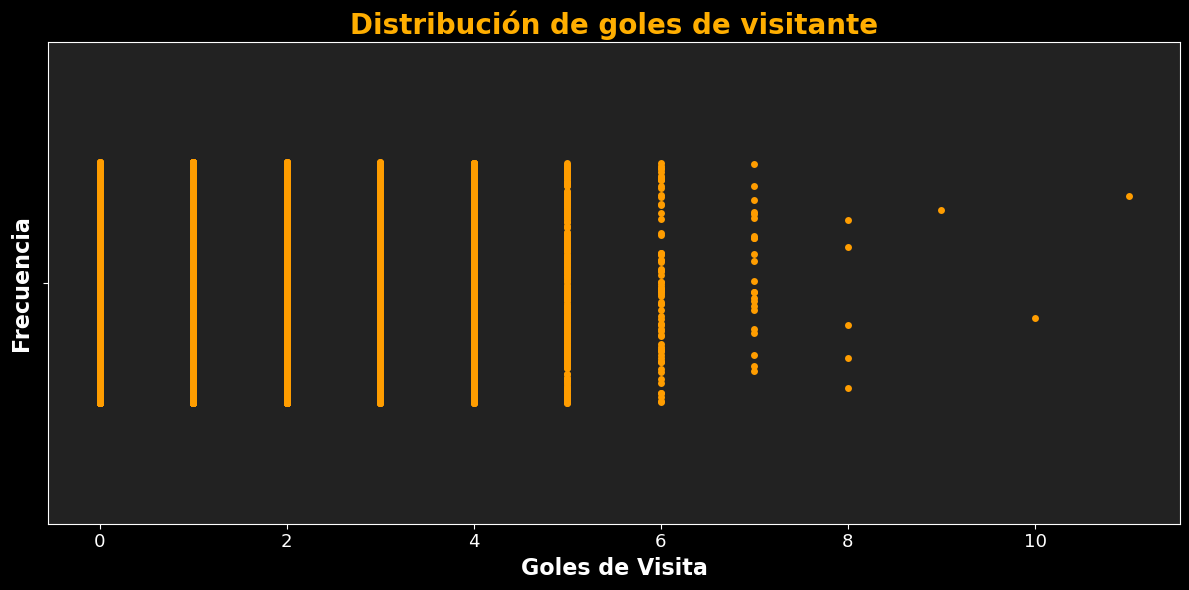

In [62]:
plt.figure(figsize=(12, 6))
sns.stripplot(x="visitor_result", data=df, color="#FF9D00", size=5, jitter=0.25)
plt.title("Distribución de goles de visitante", color="#FFAE00", fontsize=20, weight="bold")
plt.xlabel("Goles de Visita", color="white", fontsize=16, weight="bold")
plt.ylabel("Frecuencia", color="white", fontsize=16, weight="bold")
plt.xticks(color='white', fontsize=13)
plt.yticks(color='white', fontsize=13)
plt.gca().set_facecolor("#222")
plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['left'].set_color('white')
plt.tight_layout()
plt.show()

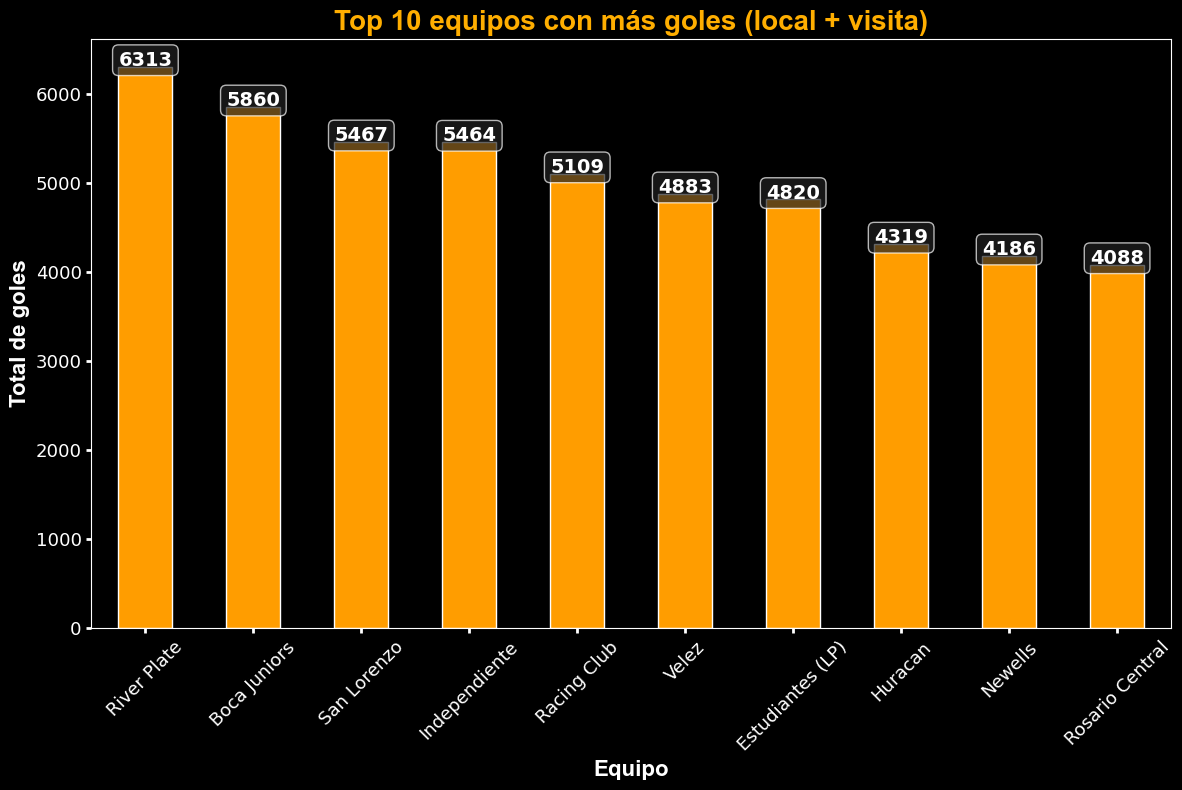

In [ ]:
goles_local = df.groupby("local_team")["local_result"].sum()
goles_visita = df.groupby("visitor_team")["visitor_result"].sum()
goles_totales = goles_local.add(goles_visita, fill_value=0)
top10_goles = goles_totales.sort_values(ascending=False).head(10)

plt.style.use("dark_background")
ax = top10_goles.plot(
    kind="bar",
    figsize=(12, 8),
    color="#FF9D00",
    edgecolor="white"
)
ax.set_title("Top 10 equipos con más goles (local + visita)", color="#FFAE00", fontsize=20, weight="bold", fontname="Arial")
ax.set_xlabel("Equipo", color="white", fontsize=16, fontweight="bold", fontname="Arial")
ax.set_ylabel("Total de goles", color="white", fontsize=16, fontweight="bold", fontname="Arial")
ax.tick_params(axis='x', colors='white', labelrotation=45, labelsize=13, width=2)
ax.tick_params(axis='y', colors='white', labelsize=13, width=2)
for spine in ax.spines.values():
    spine.set_edgecolor('white')
for i, v in enumerate(top10_goles):
    ax.text(i, v + 10, str(int(v)), color='white', ha='center', fontsize=14, fontweight='bold', bbox=dict(facecolor='#222', alpha=0.7, boxstyle='round,pad=0.3'))
plt.tight_layout()
plt.show()

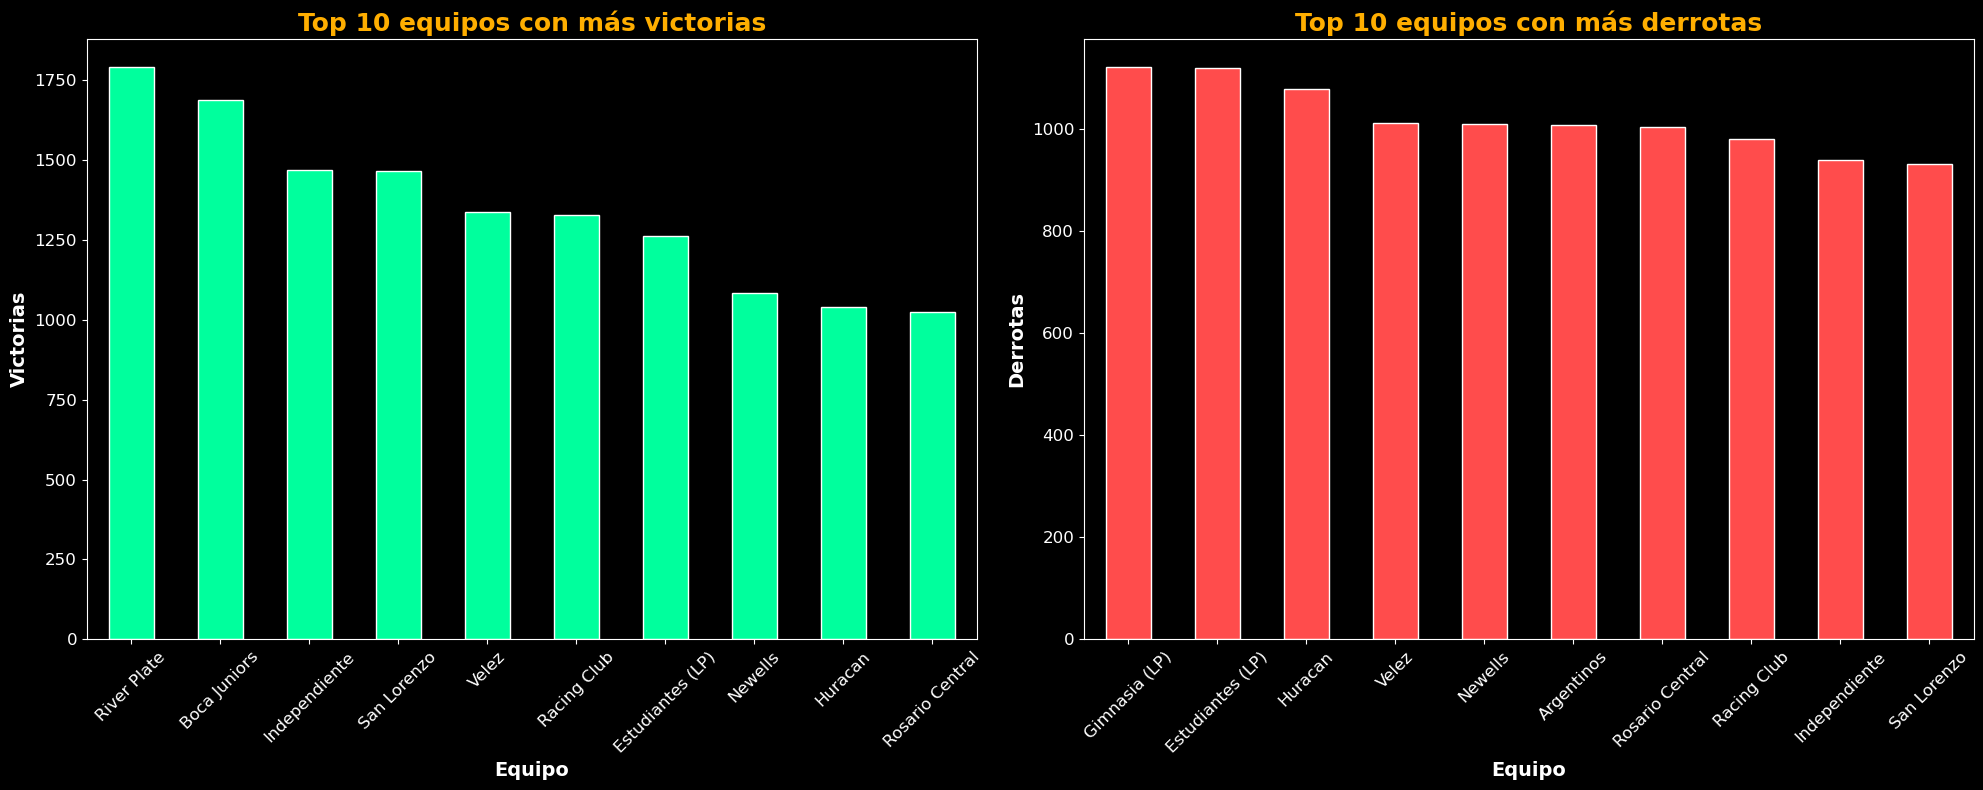

In [ ]:
def contar_victorias_derrotas(df):
    equipos = pd.unique(df["local_team"].tolist() + df["visitor_team"].tolist())
    resultados = []
    for equipo in equipos:
        victorias_local = ((df["local_team"] == equipo) & (df["local_result"] > df["visitor_result"])).sum()
        derrotas_local = ((df["local_team"] == equipo) & (df["local_result"] < df["visitor_result"])).sum()
        victorias_visita = ((df["visitor_team"] == equipo) & (df["visitor_result"] > df["local_result"])).sum()
        derrotas_visita = ((df["visitor_team"] == equipo) & (df["visitor_result"] < df["local_result"])).sum()
        resultados.append({
            "equipo": equipo,
            "victorias_local": victorias_local,
            "derrotas_local": derrotas_local,
            "victorias_visita": victorias_visita,
            "derrotas_visita": derrotas_visita
        })
    resultados_df = pd.DataFrame(resultados).set_index("equipo")
    return resultados_df

resultados_df = contar_victorias_derrotas(df)

resultados_df["victorias_totales"] = resultados_df["victorias_local"] + resultados_df["victorias_visita"]
resultados_df["derrotas_totales"] = resultados_df["derrotas_local"] + resultados_df["derrotas_visita"]

top10_victorias = resultados_df.sort_values("victorias_totales", ascending=False).head(10)

top10_derrotas = resultados_df.sort_values("derrotas_totales", ascending=False).head(10)

plt.style.use("dark_background")
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

top10_victorias["victorias_totales"].plot(kind="bar", ax=axes[0], color="#00FF9D", edgecolor="white")
axes[0].set_title("Top 10 equipos con más victorias", color="#FFAE00", fontsize=18, weight="bold")
axes[0].set_xlabel("Equipo", color="white", fontsize=14, fontweight="bold")
axes[0].set_ylabel("Victorias", color="white", fontsize=14, fontweight="bold")
axes[0].tick_params(axis='x', colors='white', labelrotation=45, labelsize=12)
axes[0].tick_params(axis='y', colors='white', labelsize=12)
for spine in axes[0].spines.values():
    spine.set_edgecolor('white')

top10_derrotas["derrotas_totales"].plot(kind="bar", ax=axes[1], color="#FF4C4C", edgecolor="white")
axes[1].set_title("Top 10 equipos con más derrotas", color="#FFAE00", fontsize=18, weight="bold")
axes[1].set_xlabel("Equipo", color="white", fontsize=14, fontweight="bold")
axes[1].set_ylabel("Derrotas", color="white", fontsize=14, fontweight="bold")
axes[1].tick_params(axis='x', colors='white', labelrotation=45, labelsize=12)
axes[1].tick_params(axis='y', colors='white', labelsize=12)
for spine in axes[1].spines.values():
    spine.set_edgecolor('white')

plt.tight_layout()
plt.show()